## Visulization of Regularization

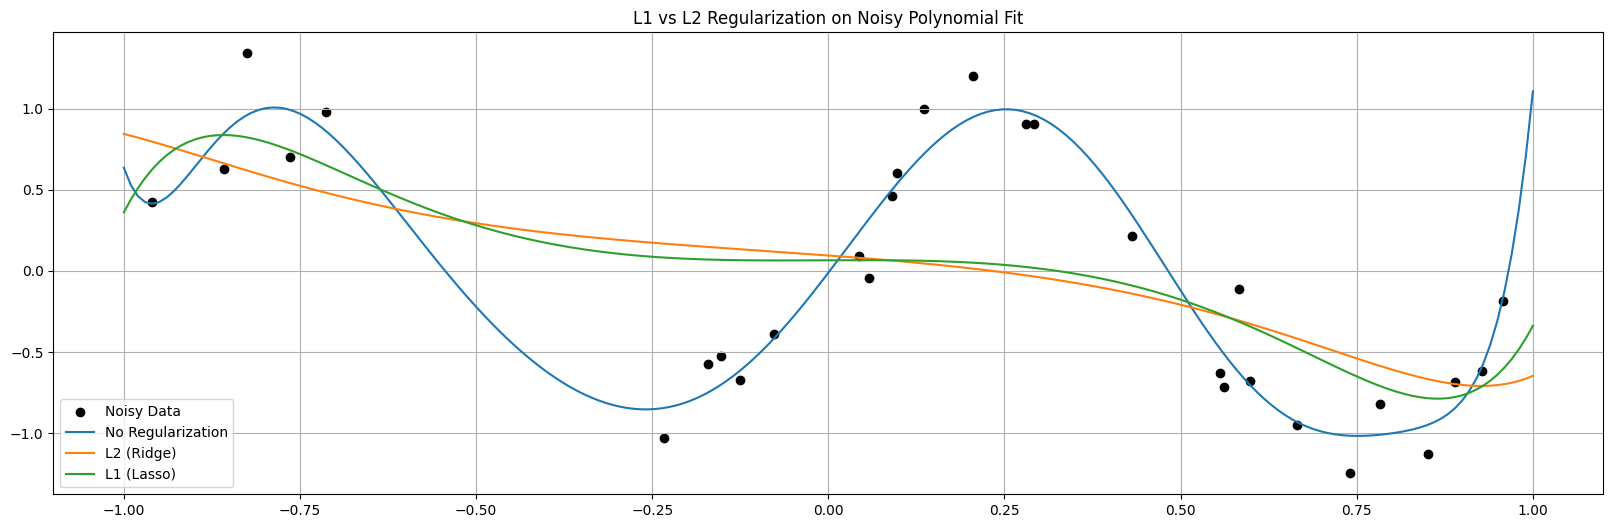

No Regularization - Train MSE: 0.0423 | Test MSE: 0.1330
L2 (Ridge) - Train MSE: 0.3200 | Test MSE: 0.5019
L1 (Lasso) - Train MSE: 0.2555 | Test MSE: 0.4178


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate noisy data
np.random.seed(0)
X = np.sort(np.random.rand(30, 1) * 2 - 1, axis=0)  # 30 points in range [-1, 1]
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # sine + noise

# Define models
degree = 10
models = {
    "No Regularization": LinearRegression(),
    "L2 (Ridge)": Ridge(alpha=1.0),
    "L1 (Lasso)": Lasso(alpha=0.01, max_iter=10000)
}

# Plot
x_test = np.linspace(-1, 1, 200).reshape(-1, 1)
plt.figure(figsize=(20, 6))
plt.scatter(X, y, color="black", label="Noisy Data")

for name, model in models.items():
    pipeline = make_pipeline(PolynomialFeatures(degree), model)
    pipeline.fit(X, y)
    y_pred = pipeline.predict(x_test)
    plt.plot(x_test, y_pred, label=name)

plt.title("L1 vs L2 Regularization on Noisy Polynomial Fit")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models.items():
    pipeline = make_pipeline(PolynomialFeatures(degree), model)
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    print(f"{name} - Train MSE: {mean_squared_error(y_train, y_train_pred):.4f} | Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")


# 5.1 Generalisation: The Goal of Machine Learning

With noise shape: (60000, 1568)
With zeros shape: (60000, 1568)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


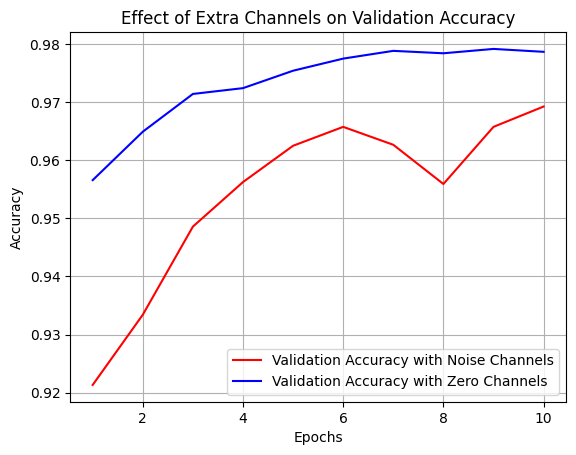

In [41]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255

# Add 784-dimensional noise
noise = np.random.random((len(train_images), 784))
train_images_with_noise_channels = np.concatenate(
    [train_images, noise],
    axis=1
)

# Add 784-dimensional zero features
zeros = np.zeros((len(train_images), 784))
train_images_with_zeros_channels = np.concatenate(
    [train_images, zeros],
    axis=1
)

print("With noise shape:", train_images_with_noise_channels.shape)
print("With zeros shape:", train_images_with_zeros_channels.shape)

# Define model function
def get_model():
    model = keras.Sequential([
        layers.Dense(units=512, activation="relu", input_shape=(1568,)),
        layers.Dense(units=10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Train on noisy input
model_noise = get_model()
history_noise = model_noise.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

# Train on zero-padded input
model_zeros = get_model()
history_zeros = model_zeros.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

# Plot validation accuracy
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "r", label="Validation Accuracy with Noise Channels")
plt.plot(epochs, val_acc_zeros, "b", label="Validation Accuracy with Zero Channels")
plt.title("Effect of Extra Channels on Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# 5.2 Evaluating Machine Learning Models


To evaluate our model we should split our model in three sets
- Training Set
- Validation Set
- Test Set

There are three type of validation techniques:
- Simple held out validation
- K-fold validation (when a very limited amount of data is available)
- Iterative K-fold validation

> Your model should beat at least common sense baseline that you set. For example, in a simple binary classification example, a random guesser can have around 50% accuracy without doing anything at all. Your model should atleast beat that.

# 5.3 Improving Model Fit

There are some cases where a model doesn't start overfitting, in that case you should first make your model to overfit by some means (for example, by increasing capacity or number of layers).

# 5.4 Improving Generalization

In [64]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, seq in enumerate(sequences):
    for j in seq:
      results[i, j] = 1;

  return results

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)



model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_original = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)



model = keras.Sequential([
    layers.Dense(units=4, activation="relu"),
    layers.Dense(units=4, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_smaller_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)



model = keras.Sequential([
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_larger_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)



from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(units=16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(units=16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)



model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(units=16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid"),
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)



epochs = range(1, 21)

plt.figure(figsize=(12, 4))
plt.plot(epochs, history_original.history["val_accuracy"], "y", label="Original Model (Units per layer = 16)")
plt.plot(epochs, history_smaller_model.history["val_accuracy"], "g", label="Smaller Model (Units per layer = 4)")
plt.plot(epochs, history_larger_model.history["val_accuracy"], "r", label="Larger Model (Units per layer = 512)")
plt.plot(epochs, history_l2_reg.history["val_accuracy"], "b", label="L2 Regularized Model")
plt.plot(epochs, history_dropout.history["val_accuracy"], "k", label="Dropout Regularized Model")
plt.title("Effect of Model Size, regularization and dropout on Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(epochs, history_original.history["val_loss"], "y", label="Original Model (Units per layer = 16)")
plt.plot(epochs, history_smaller_model.history["val_loss"], "g", label="Smaller Model (Units per layer = 4)")
plt.plot(epochs, history_larger_model.history["val_loss"], "r", label="Larger Model (Units per layer = 512)")
plt.plot(epochs, history_l2_reg.history["val_loss"], "b", label="L2 Regularized Model")
plt.plot(epochs, history_dropout.history["val_loss"], "k", label="Dropout Regularized Model")
plt.title("Effect of Model Size, regularization and dropout on Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
print(model.evaluate(test_data, test_labels))

## Summarizing:
 The following are the most common ways to maximize generalization and prevent overfitting in neural networks:
 - Get more training data, or better training data.
 - Develop better features.
 - Reduce the capacity of the model.
 - Add weight regularization (for smaller models).
 - Add dropout.